# Get the data and import the necessary librairies.


In [99]:
# ... import the relevant librairies

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# ... go to terminal :  ../rest_server/ 
# ... run ./start_rest_server.sh

# ... download from the API with request.get

response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1') 

# ... change the response into dictionairy structured as a .json this does also check if the structure is suitable for a .json

raw_data = response.json()



# ... create a pandas dataframe named df

df = pd.DataFrame.from_dict(raw_data['data']) 
# print(type(download))
# print(type(raw_data))
# display(raw_data)
# display(df)

*Run this to safe the dataframe as .csv*

In [ ]:
# ... safe the df as a .csv were the delimiter is a semi colon. 

# df.to_csv('../edited_files/raw_data.csv', index=False,sep=';')


In [58]:
df.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


In [60]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [64]:
# om kolomen uit je datasets te gooien. df_
df_drop=df.drop('smoking', axis=1)
df_drop.head ()

,genetic,length,mass,exercise,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,1.0,2,86
1,84.0,204.0,79.0,3.0,7.0,3,100
2,84.0,174.0,74.0,3.0,3.0,2,87
3,84.0,187.0,78.0,2.0,5.0,3,91
4,84.0,187.0,89.0,2.0,0.0,2,83


In [62]:
# om de colomen een ander naampje te geven
df_rename=df.rename(columns={"genetic":"dna"})

df_rename.head()

,dna,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


In [16]:
duplicate_rows_df = df[df.duplicated()]
print ("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 8)


In [67]:
# verwijder duplicates uit je dataset

df_remove_duplicate = df = df.drop_duplicates()
df_remove_duplicate.head()

df.info()
print()
df_remove_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 576.0 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   in

In [22]:
# any missing values? 

print(df.isnull().sum())

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
lifespan    0
dtype: int64


In [ ]:
# why is it missing? is it random?
# impute or delete?

# impute is erg lastig. het past namelijk dingen sals standaard deviatie, etc aan. 

In [77]:
df_dropna = df.dropna(axis = 0)
df_dropna.head()
print()
df_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8185 non-null   float64
 1   length    8185 non-null   float64
 2   mass      8185 non-null   float64
 3   exercise  8185 non-null   float64
 4   smoking   8185 non-null   float64
 5   alcohol   8185 non-null   float64
 6   sugar     8185 non-null   int64  
 7   lifespan  8185 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 575.5 KB


In [95]:
# kijk met isna welke values NaN zijn. met any waar isna true is en selecteer die met loc
df_contains_NaN = df.loc[df.isna().any(axis=1)]

# print het resultaat
print(df_contains_NaN)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
1421     81.0   188.0  91.0       NaN      0.0     10.0      4        65
1631     80.0     NaN  90.0       2.0      7.0      7.0      3        74
2146     80.0   169.0  73.0       1.0      1.0      NaN      4        70
2519     80.0   181.0  89.0       2.0      NaN      9.0      2        79
2556     79.0     NaN  75.0       2.0      0.0      6.0      3        82
3433     78.0   176.0   NaN       3.0      3.0      3.0      4        89
4095      NaN   177.0  70.0       1.0     22.0      7.0      2        70


<AxesSubplot: xlabel='lifespan'>

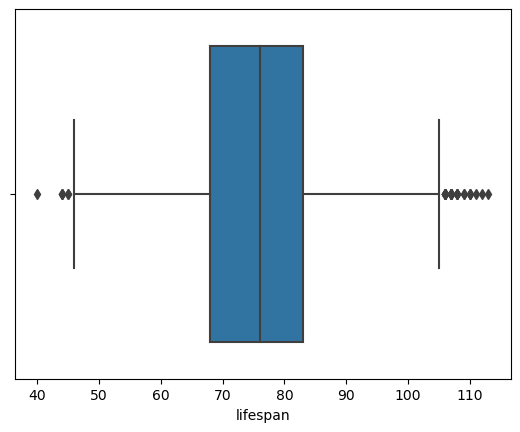

In [34]:
# got any outliers?
sns.boxplot(x=df['lifespan'])

#... alles buiten de lijnen is een outlier. 


In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print ()
print (Q3)
print ()
print (IQR)

# gooi het allemaal maar weg als het zo is. 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 +1.5*IQR))).any(axis=1)]

genetic      79.0
length      174.0
mass         70.0
exercise      1.0
smoking       3.0
alcohol       4.0
sugar         2.0
lifespan     68.0
Name: 0.25, dtype: float64

genetic      81.0
length      193.0
mass         88.0
exercise      2.0
smoking      16.0
alcohol       8.0
sugar         3.0
lifespan     83.0
Name: 0.75, dtype: float64

genetic      2.0
length      19.0
mass        18.0
exercise     1.0
smoking     13.0
alcohol      4.0
sugar        1.0
lifespan    15.0
dtype: float64


<AxesSubplot: xlabel='lifespan'>

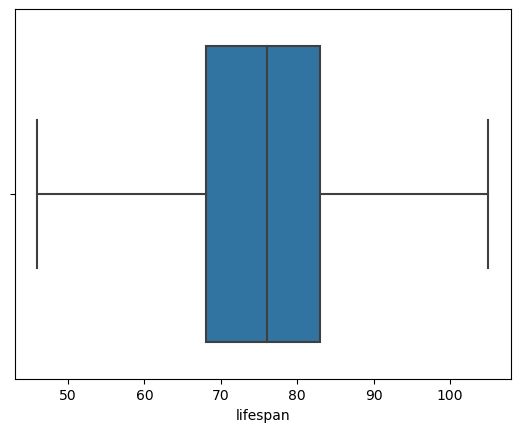

In [37]:
# got any outliers?
sns.boxplot(x=df['lifespan'])

#... alles buiten de lijnen is een outlier. 


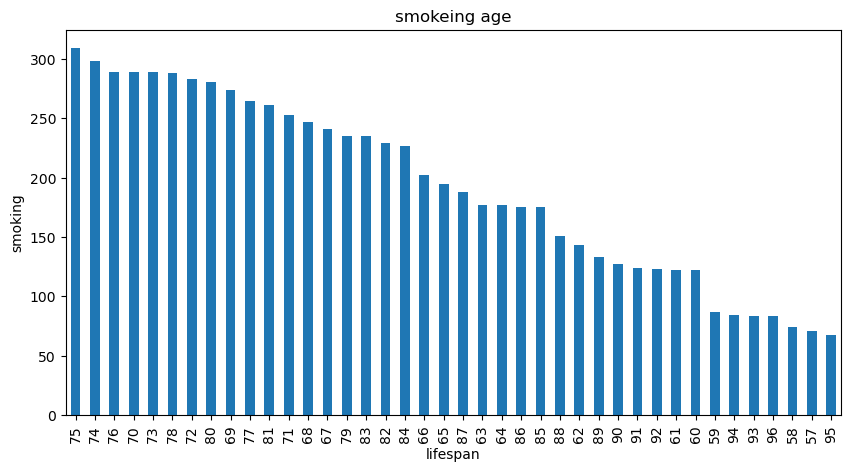

In [104]:
df.lifespan.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("smokeing age")
plt.ylabel('smoking')
plt.xlabel('lifespan');

<AxesSubplot: >

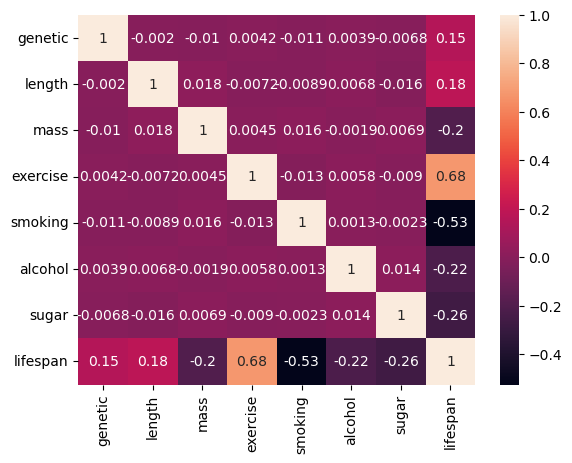

In [48]:
# maak een "heatmap" matrix om de correlaties te bekijken. 


sns.heatmap(df.corr(), annot=True)
